In [ ]:
# Install library dependencies (versions fixed to those used at time of publication)
#
%pip install DeepXDE==1.7.1

# Uncomment and run these lines if tensorflow, numpy, and matplotlib are not already installed.
# In most execution environments (Colab, tensorflow Docker image, etc.), these are already
# pre-installed on the OS.
#
#%pip install numpy==1.23.5 \
#             matplotlib==3.7.1 \
#             tensorflow==2.12.0

We solve the 1D SWE with horizontal bathymetry, periodic boundary conditions, and initial conditions:

\begin{align*}
  u(x, 0) &= 2 + \sin{\left(\frac{\pi x}{100} \right)} \\
  v(x, 0) &= 0.
\end{align*}

Using backend: tensorflow.compat.v1

2023-04-14 00:48:34.455548: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-14 00:48:34.487312: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term
Enable just-in-time compilation with XLA.



2023-04-14 00:48:35.635003: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-14 00:48:35.641477: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-14 00:48:35.641707: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf


Set the default float type to float32
Compiling model...
Building feed-forward neural network...
'build' took 0.089202 s



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/tf/swe/pinn.py:49: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  h = tf.layers.dense(x_t, h_layer_size, tf.nn.tanh)
/tf/swe/pinn.py:50: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  h = tf.layers.dense(h, h_layer_size, tf.nn.tanh)
/tf/swe/pinn.py:51: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  h = tf.layers.dense(h, h_layer_size, tf.nn.tanh)
/tf/swe/pinn.py:52: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  h_ou

'compile' took 1.035747 s

Initializing variables...
Training model...



2023-04-14 00:48:37.705202: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-04-14 00:48:37.829895: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f1ce40119d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-14 00:48:37.829929: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2023-04-14 00:48:37.848187: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-14 00:48:38.221538: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-14 00:48:39.126385: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                                                          Test loss                                                                           Test metric
0         [6.78e-04, 1.64e-01, 3.16e+00, 6.05e-01, 1.37e+00, 1.13e+00, 3.97e-02, 5.28e-03]    [6.78e-04, 1.64e-01, 3.16e+00, 6.05e-01, 1.37e+00, 1.13e+00, 3.97e-02, 5.28e-03]    []  
1000      [8.76e-03, 8.88e-03, 4.10e-02, 2.12e-04, 1.33e-03, 8.95e-05, 4.52e-05, 3.27e-05]    [8.76e-03, 8.88e-03, 4.10e-02, 2.12e-04, 1.33e-03, 8.95e-05, 4.52e-05, 3.27e-05]    []  
2000      [8.66e-03, 7.89e-03, 3.27e-02, 7.36e-05, 7.43e-04, 3.51e-05, 3.14e-05, 2.55e-05]    [8.66e-03, 7.89e-03, 3.27e-02, 7.36e-05, 7.43e-04, 3.51e-05, 3.14e-05, 2.55e-05]    []  
3000      [7.39e-03, 6.37e-03, 2.93e-02, 8.56e-05, 7.40e-04, 3.54e-05, 3.07e-05, 1.02e-05]    [7.39e-03, 6.37e-03, 2.93e-02, 8.56e-05, 7.40e-04, 3.54e-05, 3.07e-05, 1.02e-05]    []  
4000      [1.54e-02, 1.48e-02, 5.55e-02, 5.30e-04, 1.73e-03, 1.78e-04, 8.42e-0

44000     [3.31e-03, 6.31e-03, 4.12e-04, 2.55e-05, 3.70e-05, 1.35e-06, 4.86e-06, 6.00e-07]    [3.31e-03, 6.31e-03, 4.12e-04, 2.55e-05, 3.70e-05, 1.35e-06, 4.86e-06, 6.00e-07]    []  
45000     [3.00e-03, 5.93e-03, 9.75e-04, 1.51e-05, 5.10e-05, 1.11e-06, 3.21e-06, 1.35e-07]    [3.00e-03, 5.93e-03, 9.75e-04, 1.51e-05, 5.10e-05, 1.11e-06, 3.21e-06, 1.35e-07]    []  
46000     [2.74e-03, 5.83e-03, 5.81e-04, 7.17e-06, 1.56e-05, 4.58e-08, 7.17e-06, 4.24e-07]    [2.74e-03, 5.83e-03, 5.81e-04, 7.17e-06, 1.56e-05, 4.58e-08, 7.17e-06, 4.24e-07]    []  
47000     [3.78e-03, 5.07e-03, 1.93e-03, 4.95e-06, 3.18e-04, 1.63e-07, 1.59e-05, 3.09e-08]    [3.78e-03, 5.07e-03, 1.93e-03, 4.95e-06, 3.18e-04, 1.63e-07, 1.59e-05, 3.09e-08]    []  
48000     [3.09e-03, 5.82e-03, 8.08e-04, 1.16e-06, 2.14e-05, 1.08e-08, 4.41e-06, 8.68e-08]    [3.09e-03, 5.82e-03, 8.08e-04, 1.16e-06, 2.14e-05, 1.08e-08, 4.41e-06, 8.68e-08]    []  
49000     [2.90e-03, 4.38e-03, 1.43e-03, 1.33e-04, 6.55e-05, 4.92e-05, 3.69e-06, 4.59

2023-04-14 00:51:20.142827: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


Step      Train loss                                                                          Test loss                                                                           Test metric
50000     [3.11e-03, 4.34e-03, 1.65e-03, 4.11e-04, 2.85e-05, 4.44e-05, 3.23e-06, 1.87e-05]    [3.11e-03, 4.34e-03, 1.65e-03, 4.11e-04, 2.85e-05, 4.44e-05, 3.23e-06, 1.87e-05]    []  
51000     [1.05e-03, 8.55e-04, 1.78e-04, 1.45e-04, 4.53e-05, 4.55e-05, 1.27e-05, 1.75e-04]    [1.05e-03, 8.55e-04, 1.78e-04, 1.45e-04, 4.53e-05, 4.55e-05, 1.27e-05, 1.75e-04]        
52000     [7.93e-04, 5.96e-04, 9.58e-05, 3.55e-05, 1.09e-05, 6.11e-05, 2.64e-05, 7.37e-05]    [7.93e-04, 5.96e-04, 9.58e-05, 3.55e-05, 1.09e-05, 6.11e-05, 2.64e-05, 7.37e-05]        
53000     [6.28e-04, 5.39e-04, 6.42e-05, 2.35e-05, 1.75e-05, 7.08e-05, 1.16e-05, 2.94e-05]    [6.28e-04, 5.39e-04, 6.42e-05, 2.35e-05, 1.75e-05, 7.08e-05, 1.16e-05, 2.94e-05]        
54000     [5.36e-04, 5.02e-04, 4.55e-05, 3.51e-05, 8.19e-06, 6.73e-05, 1.03e-0

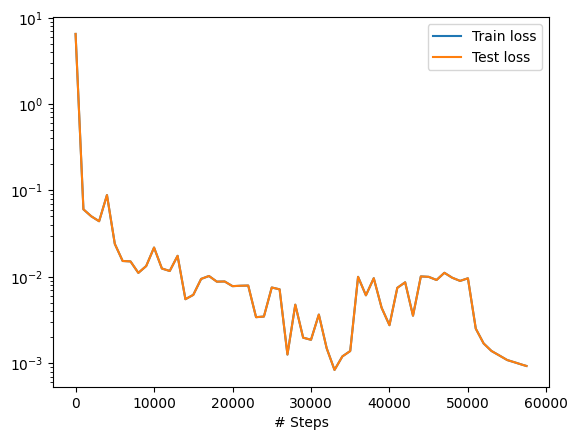

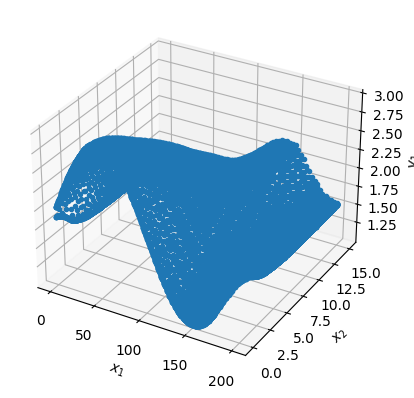

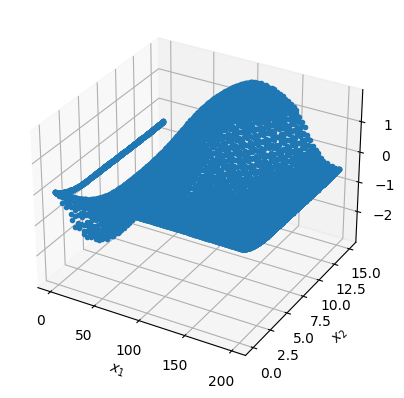

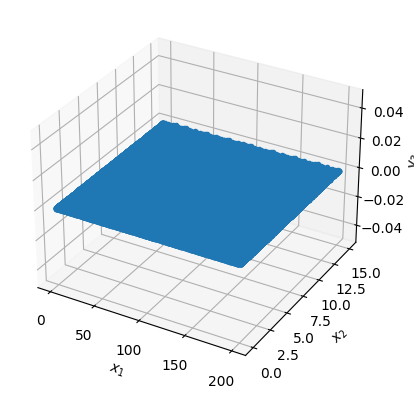

In [1]:
import deepxde as dde
import numpy as np

from pinn import swe_1d
from csv_utils import load_data, plot_point_cloud, PhysicalQuantity

# Set random seed to 0 to allow for reproducable randomness in results
#
dde.config.set_random_seed(0)

# Set default float to 32-bit since Tensorflow seems to like that better
# when training on a GPU
#
dde.config.set_default_float('float32')

# Generate domain
#
x_min, x_max = (0, 200)
t_min, t_max = (0, 15)

geom = dde.geometry.Interval(x_min, x_max)
timedomain = dde.geometry.TimeDomain(t_min, t_max)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Periodic boundary conditions for height and velocity, respectively
#
bc_h = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=0, derivative_order=0)
bc_v = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=1, derivative_order=0)

# Periodic boundary conditions for height and velocity derivatives, respectively
#
bc_h_x = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=0, derivative_order=1)
bc_v_x = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=1, derivative_order=1)

# Initial condition for wave height
#
ic_h = dde.icbc.IC(
    geomtime,
    lambda x: 2 + np.sin(x[:, 0:1] * np.pi / 100),
    lambda _, on_initial: on_initial,
    component=0,
)

# Initial condition for wave velocity
#
ic_v = dde.icbc.IC(
    geomtime,
    lambda x: 0,
    lambda _, on_initial: on_initial,
    component=1,
)

# Solve system
#
swe_1d(
    geomtime, 
    [
        ic_h, 
        ic_v
    ], 
    [
        bc_h,
        bc_v, 
        bc_h_x, 
        bc_v_x,
    ], 
    iterations=50000,
    horizontal=True,
)